<a href="https://colab.research.google.com/github/HwangHanJae/statistics_repo/blob/main/central_limit_theorem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#중심극한정리
##[참고영상](https://www.youtube.com/watch?v=iTNHQXGIEuU&ab_channel=%EA%B3%B5%EB%8F%8C%EC%9D%B4%EC%9D%98%EC%88%98%ED%95%99%EC%A0%95%EB%A6%AC%EB%85%B8%ED%8A%B8)

###모집단의 분포에 상관없이 표본평균의 분포는 정규분포에 가까워진다.

In [84]:
#라이브러리 로드
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

모집단 생성

In [85]:
uniform = stats.uniform()
n = 10000
population = uniform.rvs(n)

모집단의 분포 확인

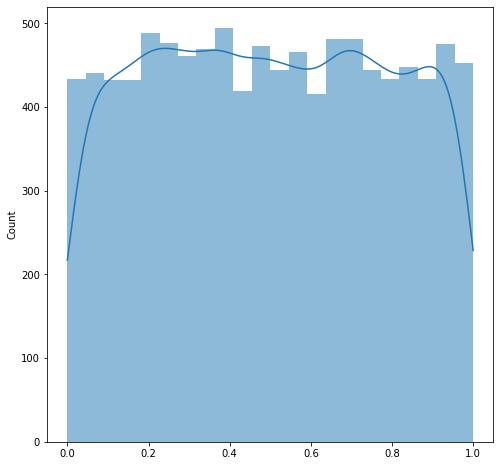

In [87]:
plt.figure(figsize=(8,8))
sns.histplot(population, kde=True, linewidth=0)
plt.show()

In [89]:
pop_mean = np.mean(population)
pop_std = np.std(population)
statistic, pvalue = stats.kstest(population, 'norm', args = (pop_mean, pop_std))
if pvalue < 0.05:
  print("정규분포를 따르지 않는다.")
else:
  print("정규분포를 따른다")

정규분포를 따르지 않는다.


**모집단의 분포가 정규분포가 아님**을 확인할 수 있음

표본을 뽑는 횟수를 늘려가면서 표본평균의 분포가 정규분포에 가까워지는지 확인해보겠음  
표본의 크기(n) : 3  
표본을 뽑는 횟수 : [10, 100, 500, 1000, 3000, 5000]

In [62]:
n = 3
sample_mean_group = []
for i in [10, 100, 500, 1000, 3000, 5000]:
  sample_means = []
  for j in range(i):
    sample_mean = np.random.choice(population, n, replace=False).mean()
    sample_means.append(sample_mean)
  sample_mean_group.append(sample_means)
print(len(sample_mean_group))

6


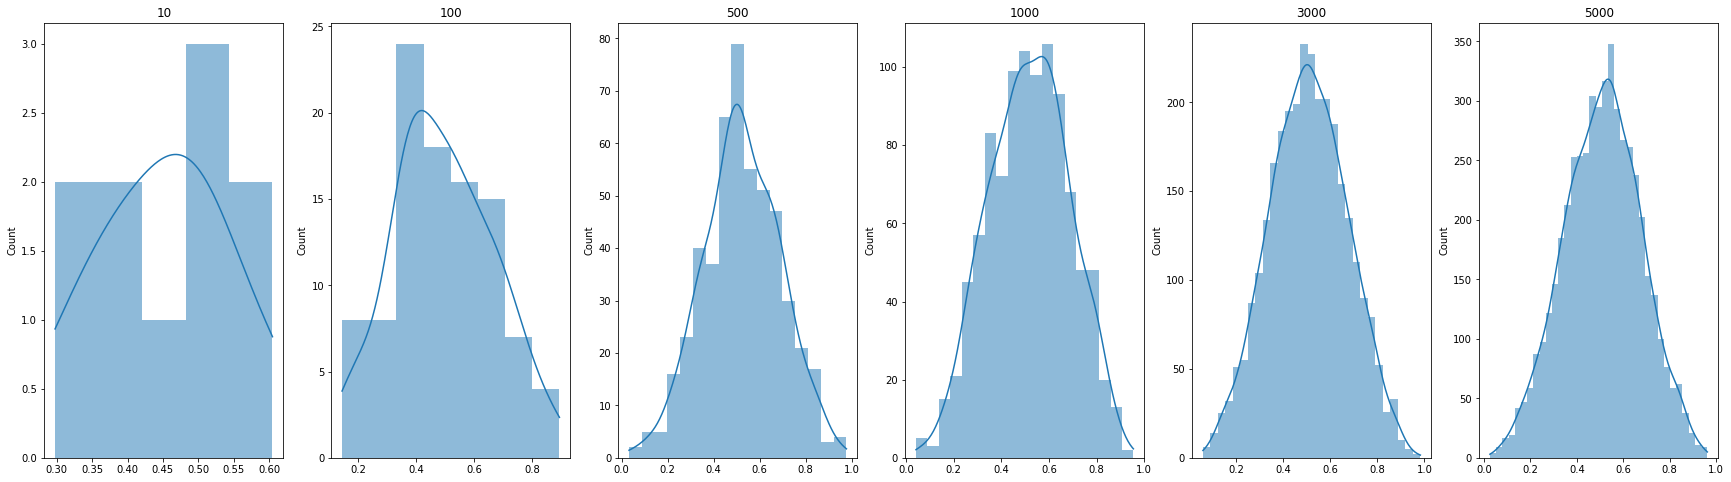

In [67]:
f, ax = plt.subplots(1,6, figsize=(30,8))
for i in range(6):
  sns.histplot(sample_mean_group[i], kde=True, linewidth=0, ax=ax[i])
  ax[i].set_title(len(sample_mean_group[i]))
plt.show()

점점 정규분포에 가까워지는 것을 확인할 수 있음

In [94]:
for i in range(6):
  mean = np.mean(sample_mean_group[i])
  std = np.std(sample_mean_group[0])
  stat, p = stats.kstest(sample_mean_group[i],'norm', args = (mean, std))
  if p < 0.05:
    print("{}번째는 정규분포를 따른다.".format(i))
    print("pvalue : ", p)
  else:
    print("{}번째는 정규분포를 따르지않는다.".format(i))
    print("pvalue : ", p)

0번째는 정규분포를 따르지않는다.
pvalue :  0.9704273289888755
1번째는 정규분포를 따른다.
pvalue :  0.0002682267472606957
2번째는 정규분포를 따른다.
pvalue :  3.246244911965088e-12
3번째는 정규분포를 따른다.
pvalue :  4.970582976929572e-27
4번째는 정규분포를 따른다.
pvalue :  1.1694445055640446e-67
5번째는 정규분포를 따른다.
pvalue :  6.146122792181517e-107
